<a href="https://colab.research.google.com/github/Bishal-Nengminja/Loan-Approval-Prediction/blob/main/Loan_Approval_Prediction_Complete_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pickle
import joblib

sns.set(style='whitegrid')

## 2. Data Loading and Initial Exploration

In [ ]:
# Load dataset
data = pd.read_csv('loan_approval_dataset.csv')

*Initial data overview*

In [ ]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
print("Dataset Shape:", data.shape)

Dataset Shape: (4269, 13)


In [ ]:
print("Column Names:", data.columns.tolist())

Column Names: ['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [ ]:
print("Dataset Info:", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
Dataset Info: N

In [ ]:
print("Basic Statistics:\n", data.describe())

Basic Statistics:
            loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000   

## 3. Data Cleaning and Preprocessing

In [ ]:
# Drop unnecessary columns
data.drop(columns=['loan_id'], inplace=True)

In [ ]:
# Strip whitespace from column names
data.columns = data.columns.str.strip()

In [ ]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [ ]:
# Check for duplicates
print(f"Duplicate rows: {data.duplicated().sum()}")

Duplicate rows: 0


## 4. Exploratory Data Analysis (EDA)
### 4.1 Target Variable Analysis

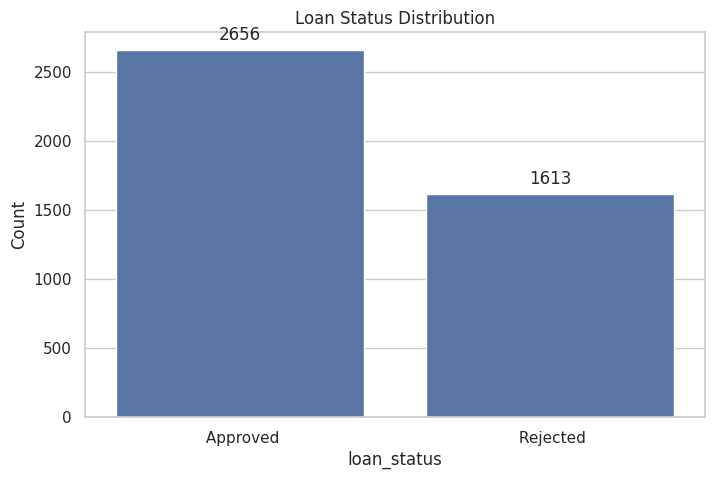

Loan Status Distribution:
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Approval Rate: 0.00%


In [ ]:
# Loan status distribution
plt.figure(figsize=(8,5))
sns.countplot(x='loan_status', data=data)
plt.title('Loan Status Distribution')
plt.ylabel('Count')
for i, v in enumerate(data['loan_status'].value_counts()):
    plt.text(i, v + 50, str(v), ha='center', va='bottom')
plt.show()

print("Loan Status Distribution:")
print(data['loan_status'].value_counts())
print(f"\nApproval Rate: {(data['loan_status'] == 'Approved').mean():.2%}")

### 4.2 Numeric Features Analysis

In [ ]:
# Define numeric features
numeric_features = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                    'residential_assets_value', 'commercial_assets_value',
                    'luxury_assets_value', 'bank_asset_value']

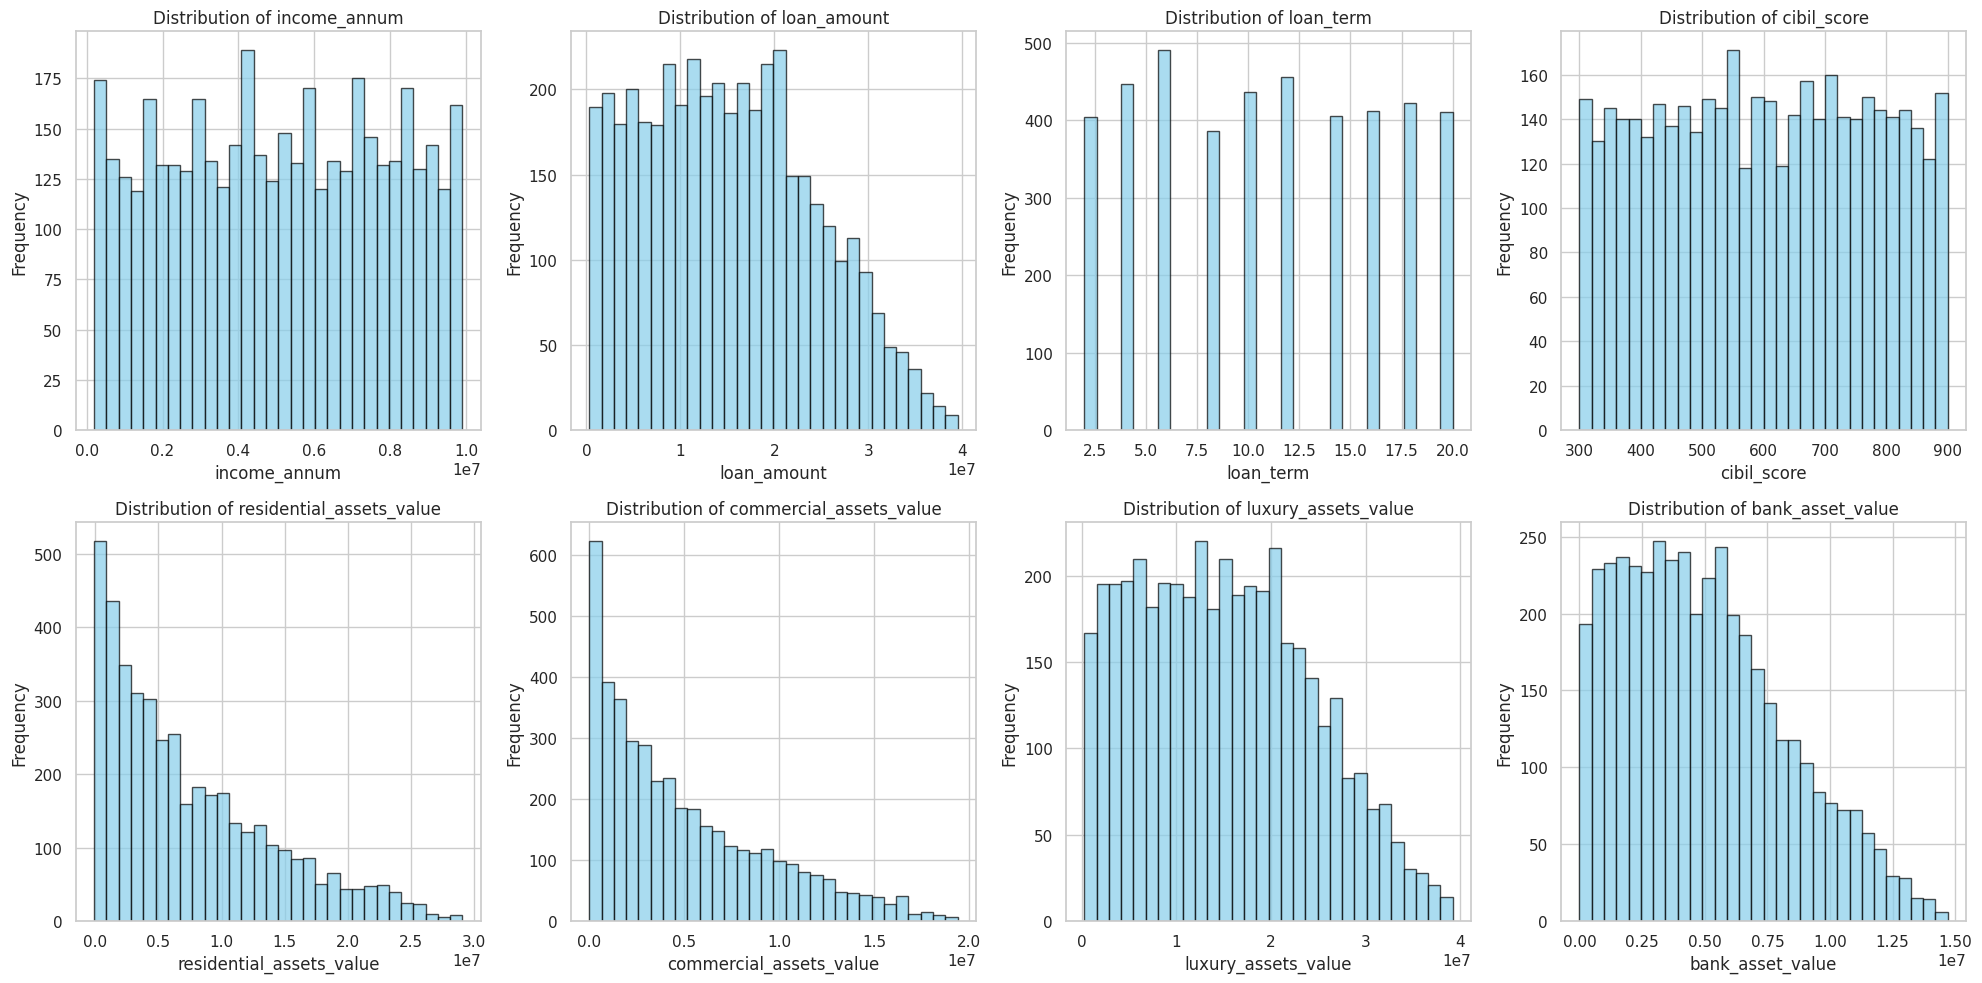

In [ ]:
# Histograms of numeric features
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    axes[i].hist(data[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Statistical summary of numeric features
print("Statistical Summary of Numeric Features:")
print(data[numeric_features].describe())

Statistical Summary of Numeric Features:
       income_annum   loan_amount    loan_term  cibil_score  \
count  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean   5.059124e+06  1.513345e+07    10.900445   599.936051   
std    2.806840e+06  9.043363e+06     5.709187   172.430401   
min    2.000000e+05  3.000000e+05     2.000000   300.000000   
25%    2.700000e+06  7.700000e+06     6.000000   453.000000   
50%    5.100000e+06  1.450000e+07    10.000000   600.000000   
75%    7.500000e+06  2.150000e+07    16.000000   748.000000   
max    9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.269000e+03             4.269000e+03         4.269000e+03   
mean               7.472617e+06             4.973155e+06         1.512631e+07   
std                6.503637e+06             4.388966e+06         9.103754e+06   
min               -1.000000e+05             0.000000e+00         3.

### 4.3 Numeric Features vs Target Analysis

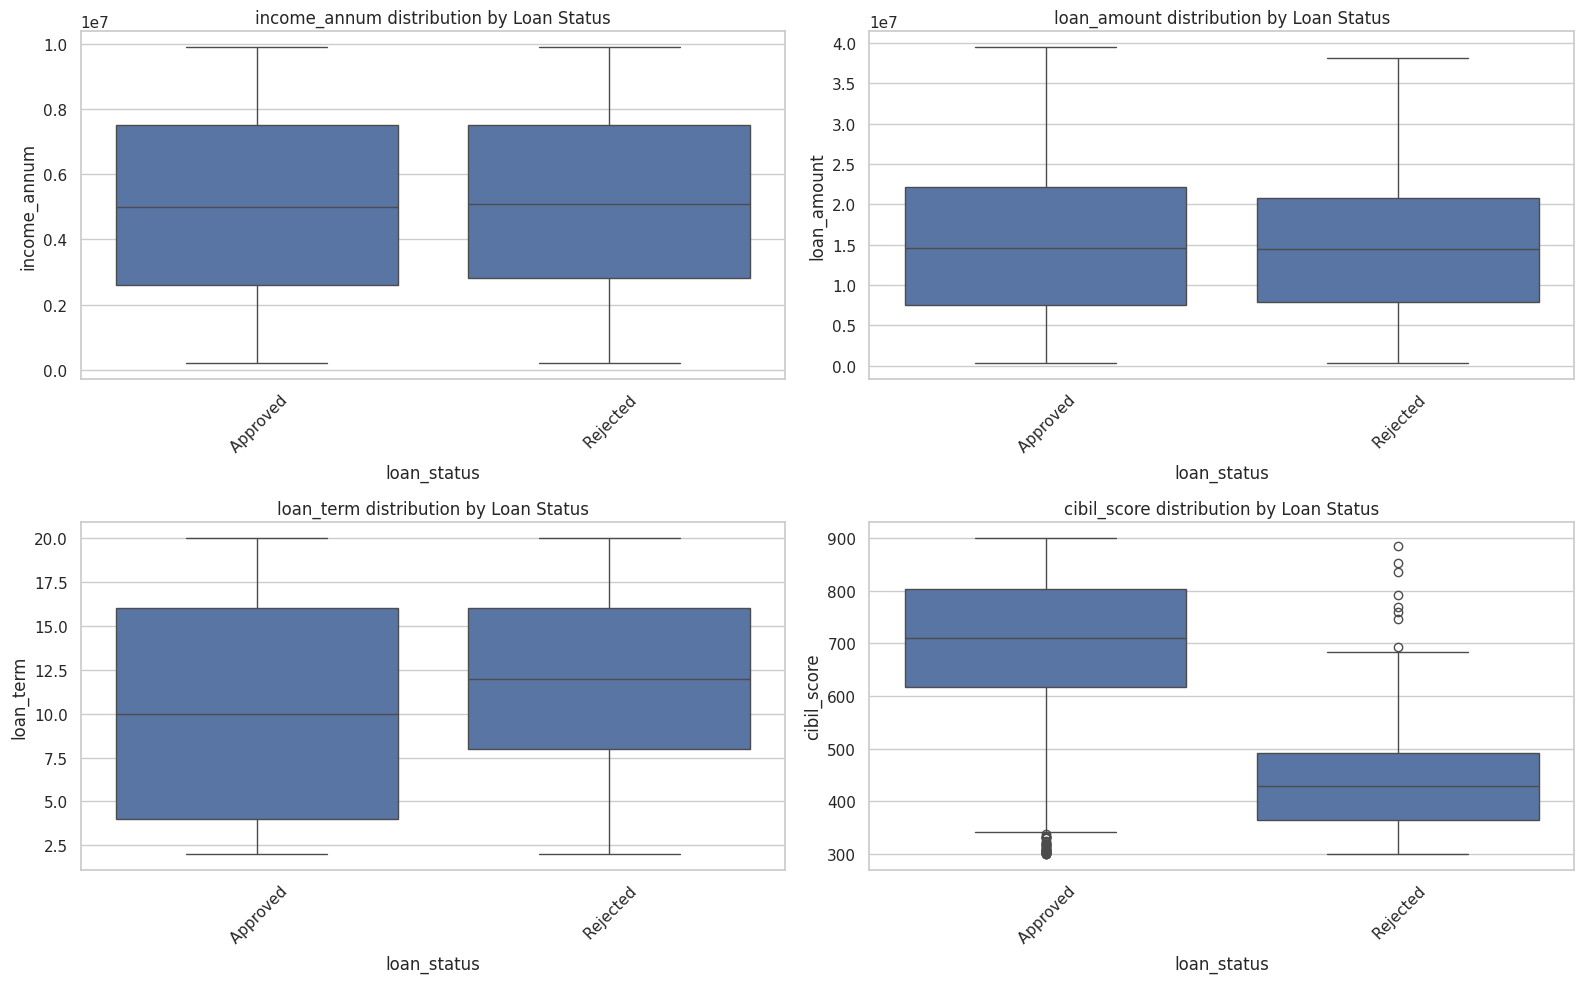

In [ ]:
# Boxplots by Loan Status for key features
plt.figure(figsize=(16,10))
key_features = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score']

for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='loan_status', y=feature, data=data)
    plt.title(f'{feature} distribution by Loan Status')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Statistical comparison by loan status
for feature in key_features:
    print(f"\n{feature} by Loan Status:")
    print(data.groupby('loan_status')[feature].describe())


income_annum by Loan Status:
              count          mean           std       min        25%  \
loan_status                                                            
Approved     2656.0  5.025904e+06  2.827228e+06  200000.0  2600000.0   
Rejected     1613.0  5.113825e+06  2.772946e+06  200000.0  2800000.0   

                   50%        75%        max  
loan_status                                   
Approved     5000000.0  7500000.0  9900000.0  
Rejected     5100000.0  7500000.0  9900000.0  

loan_amount by Loan Status:
              count          mean           std       min        25%  \
loan_status                                                            
Approved     2656.0  1.524725e+07  9.221696e+06  300000.0  7500000.0   
Rejected     1613.0  1.494606e+07  8.741390e+06  300000.0  7900000.0   

                    50%         75%         max  
loan_status                                      
Approved     14600000.0  22100000.0  39500000.0  
Rejected     14500000.0  

### 4.4 Correlation Analysis

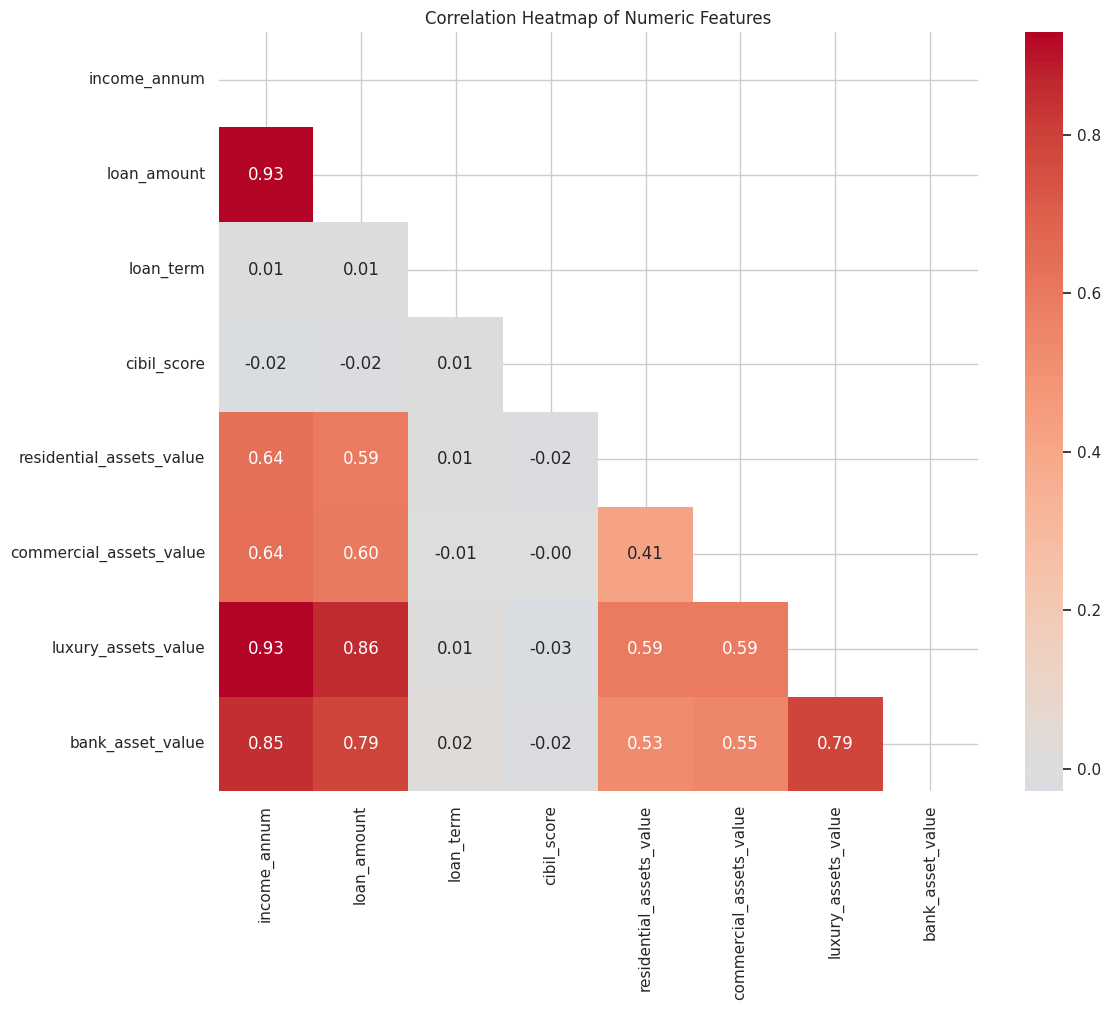

In [ ]:
# Correlation heatmap of numeric features
plt.figure(figsize=(12,10))
corr_matrix = data[numeric_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm',
            square=True, center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [ ]:
# Find highly correlated features
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr_pairs:
    print("Highly correlated feature pairs (|correlation| > 0.7):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

Highly correlated feature pairs (|correlation| > 0.7):
income_annum - loan_amount: 0.927
income_annum - luxury_assets_value: 0.929
income_annum - bank_asset_value: 0.851
loan_amount - luxury_assets_value: 0.861
loan_amount - bank_asset_value: 0.788
luxury_assets_value - bank_asset_value: 0.789


### 4.5 Categorical Features Analysis

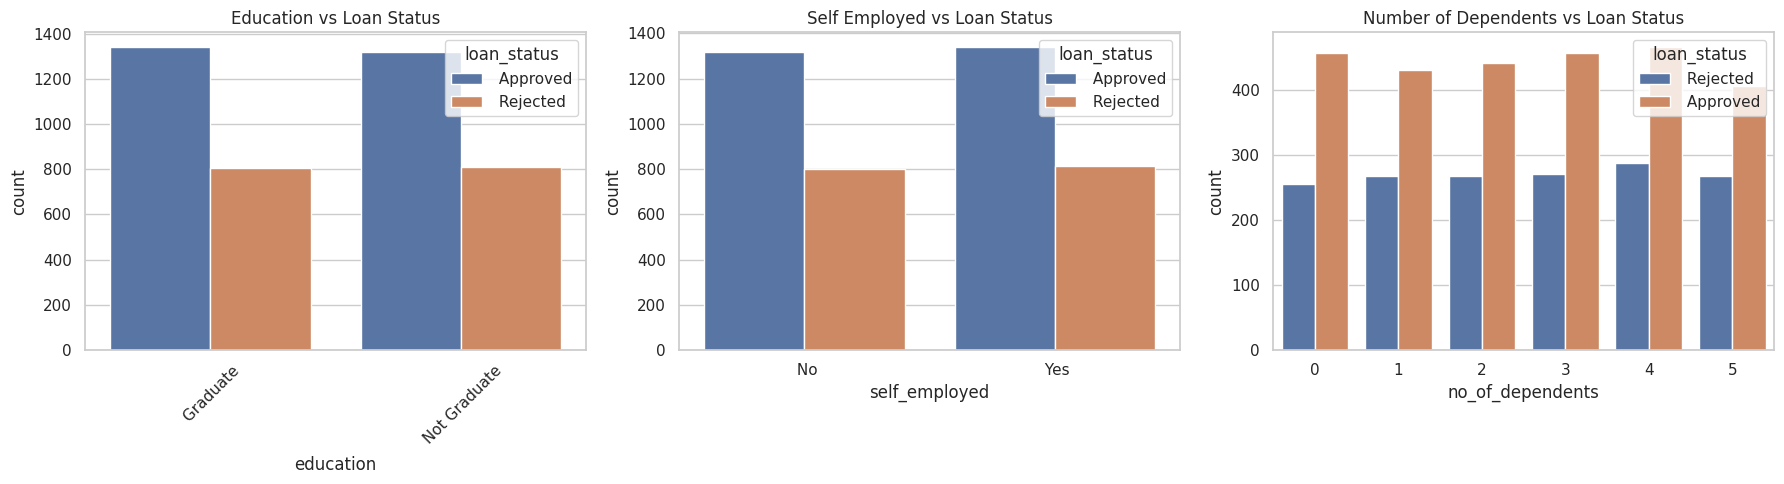

In [ ]:
# Categorical features analysis
categorical_features = ['education', 'self_employed']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Education vs Loan Status
sns.countplot(x='education', hue='loan_status', data=data, ax=axes[0])
axes[0].set_title('Education vs Loan Status')
axes[0].tick_params(axis='x', rotation=45)

# Self Employed vs Loan Status
sns.countplot(x='self_employed', hue='loan_status', data=data, ax=axes[1])
axes[1].set_title('Self Employed vs Loan Status')

# Number of Dependents vs Loan Status
sns.countplot(x='no_of_dependents', hue='loan_status', data=data, ax=axes[2])
axes[2].set_title('Number of Dependents vs Loan Status')

plt.tight_layout()
plt.show()

In [ ]:
# Approval rates by categories
print("Approval Rates by Categories:")
for feature in ['education', 'self_employed', 'no_of_dependents']:
    approval_rates = data.groupby(feature)['loan_status'].apply(
        lambda x: (x == 'Approved').mean()
    ).round(4)
    print(f"\n{feature}:")
    print(approval_rates)

Approval Rates by Categories:

education:
education
Graduate        0.0
Not Graduate    0.0
Name: loan_status, dtype: float64

self_employed:
self_employed
No     0.0
Yes    0.0
Name: loan_status, dtype: float64

no_of_dependents:
no_of_dependents
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: loan_status, dtype: float64


## 5. Feature Engineering
### 5.1 Create Combined Features

In [ ]:
# Create combined Assets feature
print("Creating combined Assets feature...")
data['Assets'] = (data['residential_assets_value'] +
                  data['commercial_assets_value'] +
                  data['luxury_assets_value'] +
                  data['bank_asset_value'])

print("Assets feature statistics:")
print(data['Assets'].describe())

Creating combined Assets feature...
Assets feature statistics:
count    4.269000e+03
mean     3.254877e+07
std      1.950656e+07
min      4.000000e+05
25%      1.630000e+07
50%      3.150000e+07
75%      4.720000e+07
max      9.070000e+07
Name: Assets, dtype: float64


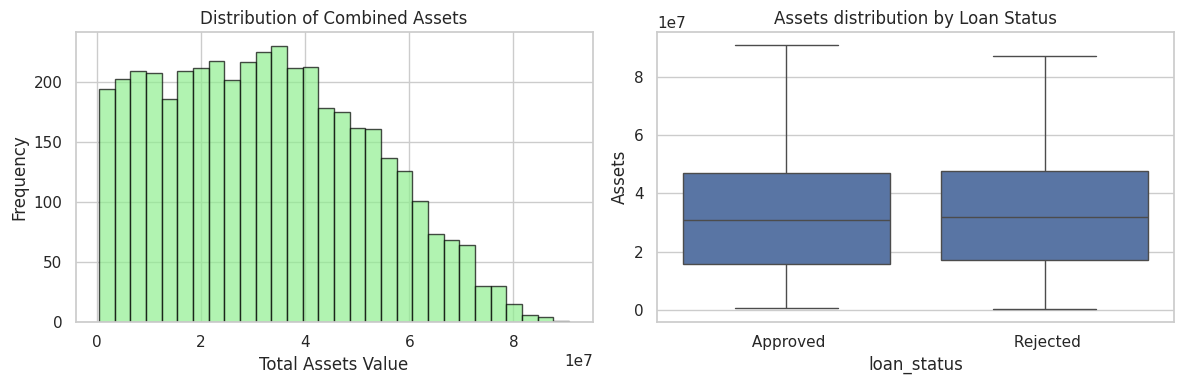

In [ ]:
# Visualize new Assets feature
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['Assets'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Combined Assets')
plt.xlabel('Total Assets Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x='loan_status', y='Assets', data=data)
plt.title('Assets distribution by Loan Status')

plt.tight_layout()
plt.show()

In [ ]:
# Drop individual asset columns
asset_columns = ['residential_assets_value', 'commercial_assets_value',
                'luxury_assets_value', 'bank_asset_value']
data.drop(asset_columns, axis=1, inplace=True)
print(f"Dropped columns: {asset_columns}")

Dropped columns: ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


### 5.2 Encode Categorical Variables

In [ ]:
# Store original values for reference
original_education = data['education'].unique()
original_self_employed = data['self_employed'].unique()
original_loan_status = data['loan_status'].unique()

print("Original categorical values:")
print(f"Education: {original_education}")
print(f"Self Employed: {original_self_employed}")
print(f"Loan Status: {original_loan_status}")

Original categorical values:
Education: [' Graduate' ' Not Graduate']
Self Employed: [' No' ' Yes']
Loan Status: [' Approved' ' Rejected']


In [ ]:
# Encode categorical variables
# Education: Graduate=0, Not Graduate=1
data['education'] = data['education'].apply(lambda x: 0 if x.strip().lower() == 'graduate' else 1)

# Self Employed: No=0, Yes=1
data['self_employed'] = data['self_employed'].apply(lambda x: 0 if x.strip().lower() == 'no' else 1)

# Loan Status: Rejected=0, Approved=1
data['loan_status'] = data['loan_status'].apply(lambda x: 1 if x.strip().lower() == 'approved' else 0)

print("\nEncoded values:")
print("Education - Graduate: 0, Not Graduate: 1")
print("Self Employed - No: 0, Yes: 1")
print("Loan Status - Rejected: 0, Approved: 1")


Encoded values:
Education - Graduate: 0, Not Graduate: 1
Self Employed - No: 0, Yes: 1
Loan Status - Rejected: 0, Approved: 1


In [ ]:
# Verify encoding
print(f"\nEncoding verification:")
print(f"Education unique values: {sorted(data['education'].unique())}")
print(f"Self Employed unique values: {sorted(data['self_employed'].unique())}")
print(f"Loan Status unique values: {sorted(data['loan_status'].unique())}")


Encoding verification:
Education unique values: [np.int64(0), np.int64(1)]
Self Employed unique values: [np.int64(0), np.int64(1)]
Loan Status unique values: [np.int64(0), np.int64(1)]


## 6. Final Data Preparation
### 6.1 Feature Selection

In [ ]:
# Define final feature set
features = [
    'no_of_dependents', 'education', 'self_employed',
    'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'Assets'
]
target = 'loan_status'

In [ ]:
print("Final feature set:")
print(features)
print(f"\nTarget variable: {target}")

Final feature set:
['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'Assets']

Target variable: loan_status


In [ ]:
# Check final dataset
print(f"\nFinal dataset shape: {data.shape}")
print(f"Features shape: {data[features].shape}")
print(f"Target shape: {data[target].shape}")


Final dataset shape: (4269, 9)
Features shape: (4269, 8)
Target shape: (4269,)


In [ ]:
# Final data overview
print("\nFinal dataset info:")
print(data[features + [target]].info())


Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   no_of_dependents  4269 non-null   int64
 1   education         4269 non-null   int64
 2   self_employed     4269 non-null   int64
 3   income_annum      4269 non-null   int64
 4   loan_amount       4269 non-null   int64
 5   loan_term         4269 non-null   int64
 6   cibil_score       4269 non-null   int64
 7   Assets            4269 non-null   int64
 8   loan_status       4269 non-null   int64
dtypes: int64(9)
memory usage: 300.3 KB
None


### 6.2 Feature Scaling

In [ ]:
# Initialize and fit scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])
y = data[target].values

In [ ]:
print("Feature scaling completed")
print(f"Scaled features shape: {X_scaled.shape}")
print(f"Target shape: {y.shape}")

Feature scaling completed
Scaled features shape: (4269, 8)
Target shape: (4269,)


In [ ]:
# Save scaler for deployment
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")

Scaler saved as 'scaler.pkl'


In [ ]:
# Display scaling statistics
feature_means = scaler.mean_
feature_scales = scaler.scale_

print("\nScaling Statistics:")
scaling_stats = pd.DataFrame({
    'Feature': features,
    'Original_Mean': data[features].mean().values,
    'Scaled_Mean': feature_means,
    'Scale_Factor': feature_scales
})
print(scaling_stats)


Scaling Statistics:
            Feature  Original_Mean   Scaled_Mean  Scale_Factor
0  no_of_dependents   2.498712e+00  2.498712e+00  1.695712e+00
1         education   4.977747e-01  4.977747e-01  4.999950e-01
2     self_employed   5.036308e-01  5.036308e-01  4.999868e-01
3      income_annum   5.059124e+06  5.059124e+06  2.806511e+06
4       loan_amount   1.513345e+07  1.513345e+07  9.042304e+06
5         loan_term   1.090045e+01  1.090045e+01  5.708519e+00
6       cibil_score   5.999361e+02  5.999361e+02  1.724102e+02
7            Assets   3.254877e+07  3.254877e+07  1.950428e+07


## 7. Train-Test Split

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Data split completed:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training set positive class ratio: {y_train.mean():.3f}")
print(f"Test set positive class ratio: {y_test.mean():.3f}")

Data split completed:
Training set: 3415 samples
Test set: 854 samples
Training set positive class ratio: 0.622
Test set positive class ratio: 0.622


## 8. Model Training

In [ ]:
# Train Logistic Regression model
print("Training Logistic Regression model...")
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

print("Model training completed")
print(f"Model converged: {'Yes' if model.n_iter_[0] < model.max_iter else 'No'}")
print(f"Number of iterations: {model.n_iter_[0]}")

Training Logistic Regression model...
Model training completed
Model converged: Yes
Number of iterations: 14


## 9. Model Evaluation

In [ ]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Model Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Overfitting Check: {abs(train_accuracy - test_accuracy):.4f}")

Model Performance:
Training Accuracy: 0.9168
Test Accuracy: 0.9133
Overfitting Check: 0.0035


*DETAILED TEST SET EVALUATION*

In [ ]:
print(f"\nAccuracy: {test_accuracy:.4f}")

print(f"\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)


Accuracy: 0.9133

Confusion Matrix:
[[278  45]
 [ 29 502]]


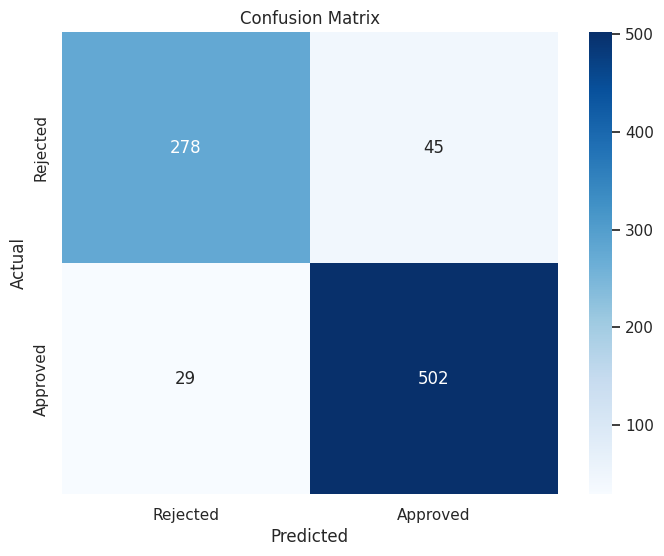


Classification Report:
              precision    recall  f1-score   support

    Rejected       0.91      0.86      0.88       323
    Approved       0.92      0.95      0.93       531

    accuracy                           0.91       854
   macro avg       0.91      0.90      0.91       854
weighted avg       0.91      0.91      0.91       854



In [ ]:
# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(f"\nClassification Report:")
print(classification_report(y_test, y_test_pred,
                          target_names=['Rejected', 'Approved']))

## 10. Feature Importance Analysis

In [ ]:
# Feature importance from model coefficients
importance = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importance,
    'Abs_Importance': np.abs(importance)
}).sort_values('Abs_Importance', ascending=False)

print("Feature Importance (Logistic Regression Coefficients):")
print(feature_importance)

Feature Importance (Logistic Regression Coefficients):
            Feature  Importance  Abs_Importance
6       cibil_score    4.069199        4.069199
3      income_annum   -1.491322        1.491322
4       loan_amount    1.331973        1.331973
5         loan_term   -0.852296        0.852296
7            Assets    0.269319        0.269319
0  no_of_dependents   -0.073964        0.073964
1         education   -0.067797        0.067797
2     self_employed    0.016490        0.016490


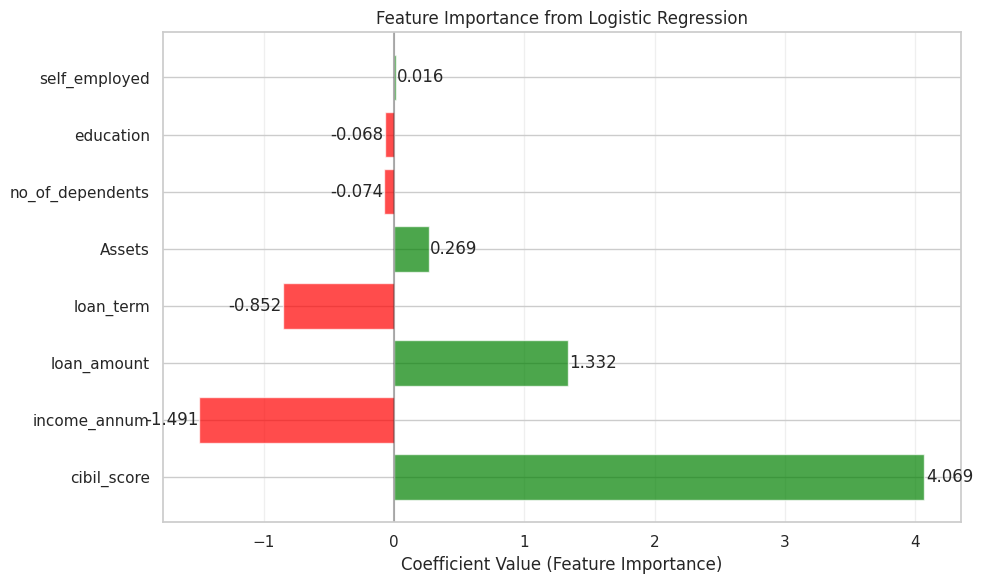


Feature Importance Interpretation:
Positive coefficients increase approval probability
Negative coefficients decrease approval probability
Larger absolute values indicate stronger influence


In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in feature_importance['Importance']]
plt.barh(range(len(feature_importance)), feature_importance['Importance'], color=colors, alpha=0.7)
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.xlabel('Coefficient Value (Feature Importance)')
plt.title('Feature Importance from Logistic Regression')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(feature_importance['Importance']):
    plt.text(v + (0.01 if v > 0 else -0.01), i, f'{v:.3f}',
             ha='left' if v > 0 else 'right', va='center')

plt.tight_layout()
plt.show()

# Interpretation
print("\nFeature Importance Interpretation:")
print("Positive coefficients increase approval probability")
print("Negative coefficients decrease approval probability")
print("Larger absolute values indicate stronger influence")

## 11. Model Insights and Summary

*MODEL INSIGHTS AND SUMMARY*

In [ ]:
print(f"Dataset: {data.shape[0]} samples, {len(features)} features")
print(f"Model: Logistic Regression")
print(f"Test Accuracy: {test_accuracy:.4f}")

Dataset: 4269 samples, 8 features
Model: Logistic Regression
Test Accuracy: 0.9133


In [ ]:
print(f"\nTop 3 Most Important Features:")
top_features = feature_importance.head(3)
for idx, row in top_features.iterrows():
    direction = "increases" if row['Importance'] > 0 else "decreases"
    print(f"1. {row['Feature']}: {direction} approval probability (coef: {row['Importance']:.3f})")


Top 3 Most Important Features:
1. cibil_score: increases approval probability (coef: 4.069)
1. income_annum: decreases approval probability (coef: -1.491)
1. loan_amount: increases approval probability (coef: 1.332)


In [ ]:
print(f"\nModel Interpretation:")
print("- Higher CIBIL score strongly increases approval chances")
print("- Higher income generally increases approval probability")
print("- The model shows good generalization (low overfitting)")


Model Interpretation:
- Higher CIBIL score strongly increases approval chances
- Higher income generally increases approval probability
- The model shows good generalization (low overfitting)


In [ ]:
# Business recommendations
print(f"\nBusiness Recommendations:")
print("1. Focus on applicants with CIBIL scores above 650")
print("2. Consider income-to-loan ratio in decision making")
print("3. Asset value is important - collect comprehensive asset information")
print("4. Education level impacts approval - factor in professional qualifications")


Business Recommendations:
1. Focus on applicants with CIBIL scores above 650
2. Consider income-to-loan ratio in decision making
3. Asset value is important - collect comprehensive asset information
4. Education level impacts approval - factor in professional qualifications


## 12. Save Model and Components

In [ ]:
# Save the trained model
with open('loan_approval_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save feature names and other metadata
model_metadata = {
    'features': features,
    'target': target,
    'model_type': 'LogisticRegression',
    'test_accuracy': test_accuracy,
    'feature_importance': feature_importance.to_dict(),
    'encoding_info': {
        'education': 'Graduate=0, Not Graduate=1',
        'self_employed': 'No=0, Yes=1',
        'loan_status': 'Rejected=0, Approved=1'
    }
}

with open('model_metadata.pkl', 'wb') as f:
    pickle.dump(model_metadata, f)

print("Model and metadata saved successfully!")
print("Files created:")
print("- loan_approval_model.pkl (trained model)")
print("- scaler.pkl (feature scaler)")
print("- model_metadata.pkl (model information)")

print(f"\nModel ready for deployment!")
print(f"Test Accuracy: {test_accuracy:.4f}")

Model and metadata saved successfully!
Files created:
- loan_approval_model.pkl (trained model)
- scaler.pkl (feature scaler)
- model_metadata.pkl (model information)

Model ready for deployment!
Test Accuracy: 0.9133
